In [20]:
import os

from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


sns.set_theme(style="whitegrid")
import numpy as np
import pandas as pd


from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer

In [21]:
from settings import PATH, DATABASE_PATH
csv = "penguins_size.csv"

In [22]:
df = pd.read_csv(os.path.join(DATABASE_PATH, csv))
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [23]:
df.replace('.', float('NAN'), inplace=True)
df = df.dropna(how="all")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [24]:
x = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
y = df['species']

In [ ]:
print(x)

In [ ]:
print(y)

Criando um árvore de decisão para prever a especie de pinguins com base nas caracteristicas fisicas de cada especie.

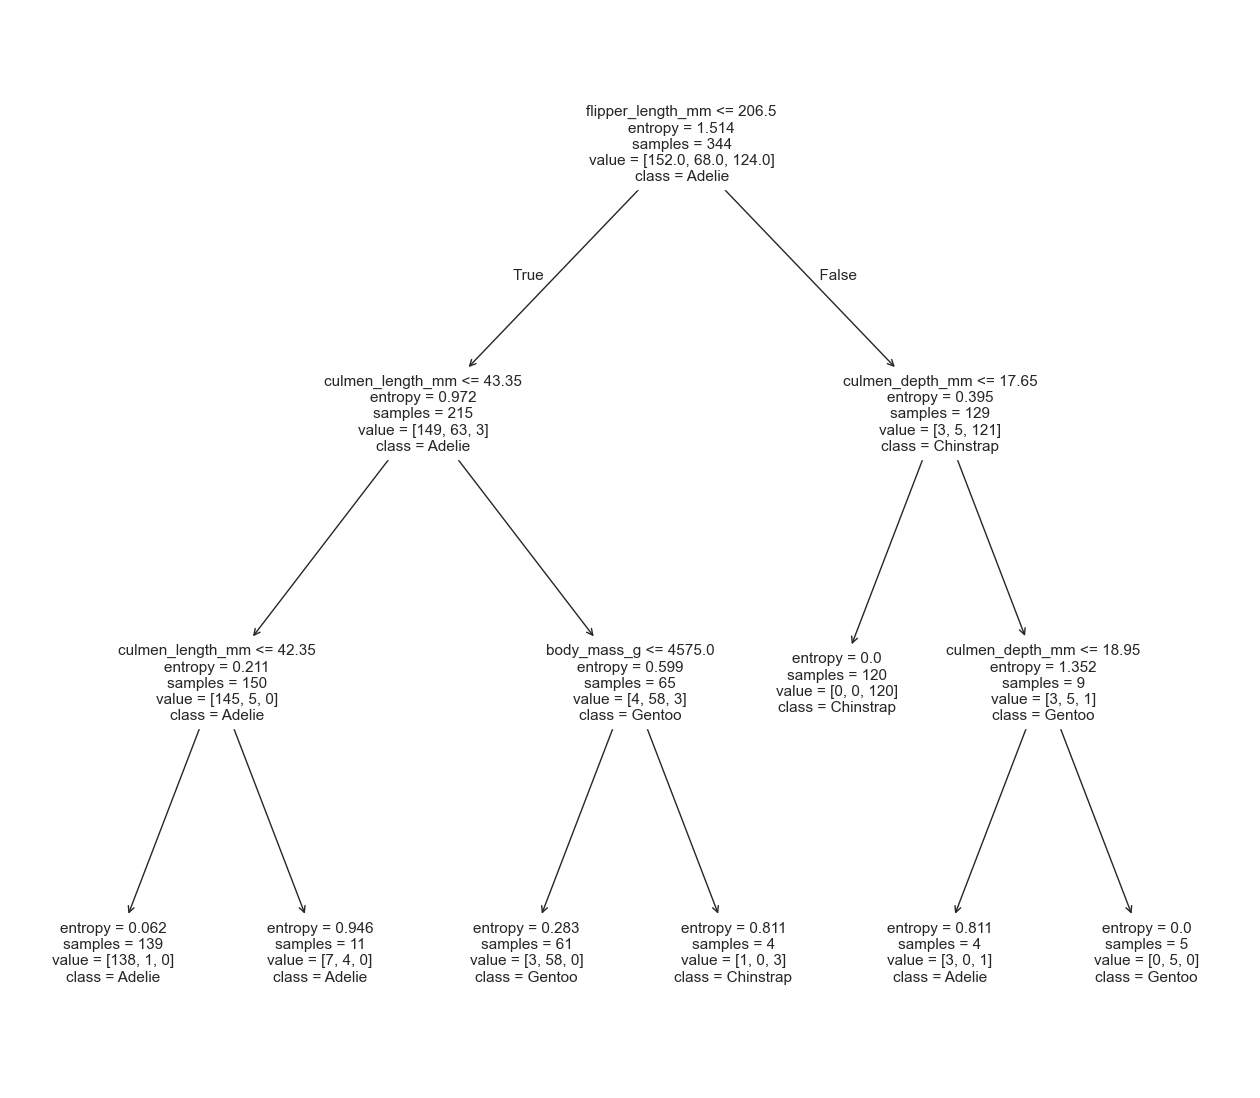

In [25]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt_model = dt.fit(x, y)
fig = plt.figure(figsize=(16, 14))
tree.plot_tree(dt_model, feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], class_names=['Adelie', 'Gentoo', 'Chinstrap'])
plt.show()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [ ]:
print(y_train)

In [27]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt_model = dt.fit(x_train, y_train)
train = dt_model.score(x_train, y_train)
test = dt_model.score(x_test, y_test)

In [28]:
print(train)
print(test)

0.96
0.9855072463768116


In [29]:
y_pred = dt_model.predict(x_test)

In [30]:
print(confusion_matrix(y_test, y_pred))

[[37  0  1]
 [ 0 11  0]
 [ 0  0 20]]


In [31]:
print(accuracy_score(y_test, y_pred)*100)

98.55072463768117


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        38
   Chinstrap       1.00      1.00      1.00        11
      Gentoo       0.95      1.00      0.98        20

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



Usando o gini

In [33]:
x_train_gini, x_test_gini, y_train_gini, y_test_gini = train_test_split(x, y,test_size=0.2)

In [36]:
dt = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt_model = dt.fit(x_train_gini, y_train_gini)
train_gini = dt_model.score(x_train_gini, y_train_gini)
test_gini = dt_model.score(x_test_gini, y_test_gini)

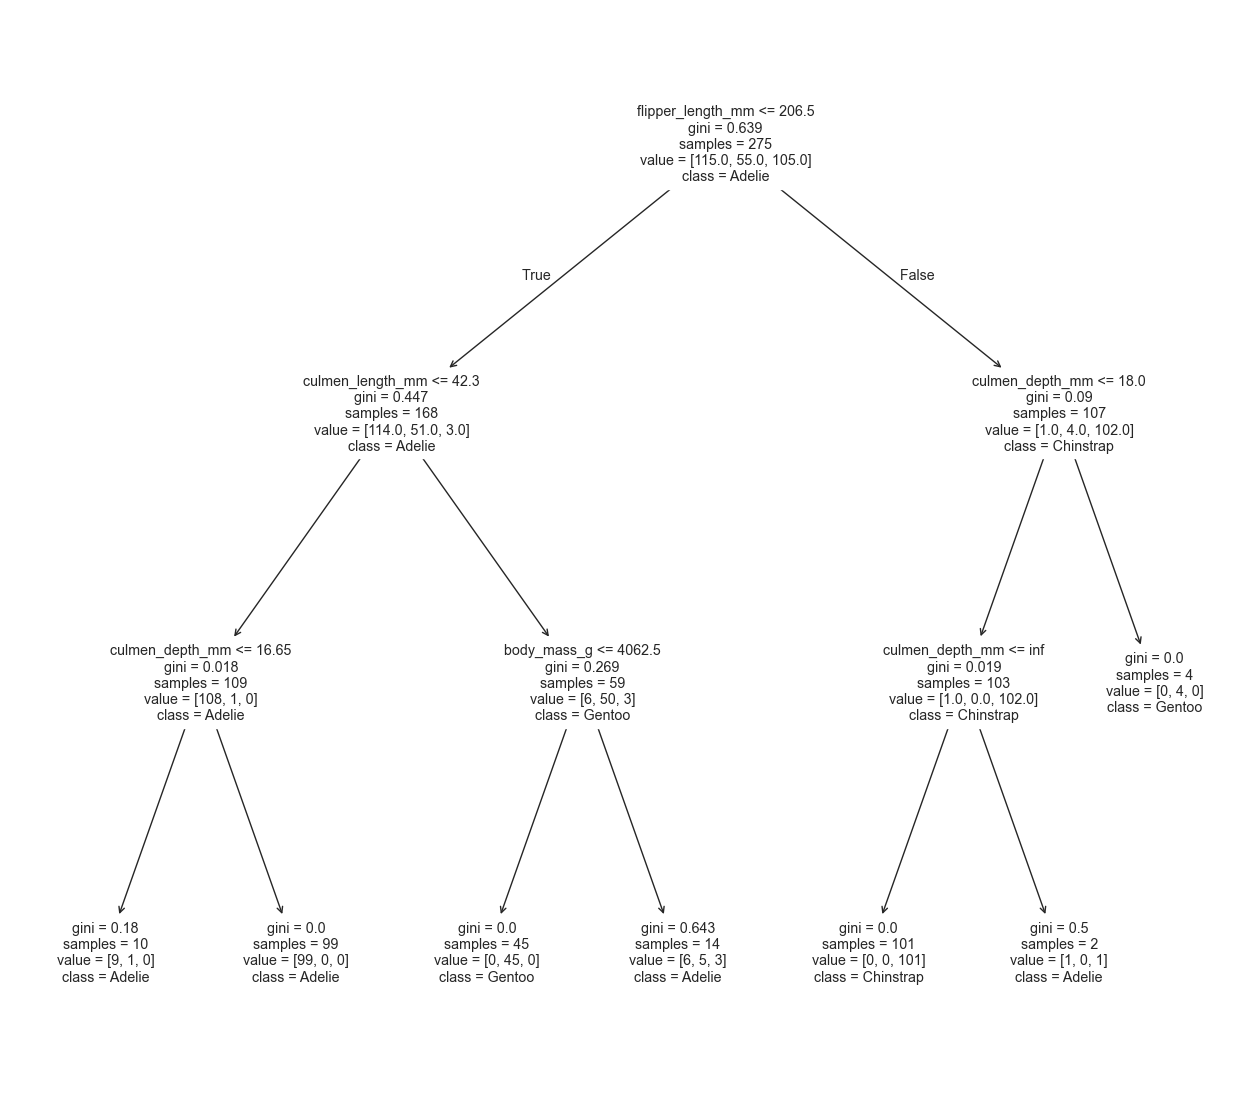

In [37]:
fig = plt.figure(figsize=(16, 14))
tree.plot_tree(dt_model, feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], class_names=['Adelie', 'Gentoo', 'Chinstrap'])
plt.show()

In [38]:
print(train_gini)
print(test_gini)

0.9709090909090909
0.9130434782608695


In [39]:
y_pred_gini = dt_model.predict(x_test_gini)

In [40]:
print(confusion_matrix(y_test_gini, y_pred_gini))

[[34  2  1]
 [ 3 10  0]
 [ 0  0 19]]


In [41]:
print(accuracy_score(y_test_gini, y_pred_gini)*100)

91.30434782608695


In [42]:
print(classification_report(y_test_gini, y_pred_gini))

              precision    recall  f1-score   support

      Adelie       0.92      0.92      0.92        37
   Chinstrap       0.83      0.77      0.80        13
      Gentoo       0.95      1.00      0.97        19

    accuracy                           0.91        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.91      0.91      0.91        69

